<a href="https://colab.research.google.com/github/engineerjkk/LinkPrediction/blob/main/Link_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import networkx as nx
import math
import itertools
import numpy as np

In [39]:
def comb(n, k):
    if (n<0 or k<0):
        return None
    else:
        return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

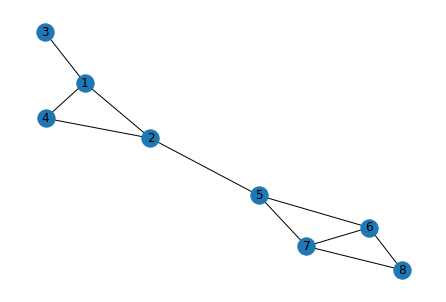

In [40]:
G = nx.Graph()
edgeList = [(1, 2),(1, 3),(1, 4),(2, 4),(2, 5),(5, 6),(5, 7),(6, 7),(6, 8),(7, 8)]
G.add_edges_from(edgeList)
nx.draw(G, with_labels=True)

In [41]:
# score based on mutual information
def s(x , y, prior, likelihood):
 # common neighbors
 CN = nx.common_neighbors(G, x, y)
 # prior (x, y)
 priorXY = - np.log2(prior(x, y, G))
 # sum over neighbors
 cnMI = 0
 for z in CN:
   # degree of z
   kz = G.degree(z)
   coeffZ = 1 / (kz * (kz-1))
   # sum over edges = neighbors of z
   zMI = 0
   for m, n in itertools.combinations(G.neighbors(z), 2):
     priorInfo = -np.log2(prior(m, n, G))
     likelihoodInfo = -np.log2(likelihood(z, G))
     # combine mutual information
     zMI += 2 * (priorInfo -likelihoodInfo)
   # add average mutual information per neighbor
   cnMI += coeffZ * zMI
 return cnMI -priorXY

In [45]:
def prior(m, n, G):
 kn = G.degree(n)
 km = G.degree(m)
 M = G.number_of_edges()
 
 return 1-(comb(M-kn, km))/(comb(M, km))

In [48]:
def likelihood(z, G):
 kz = G.degree(z)
 N_triangles = nx.triangles(G, z)
 N_triads = comb(kz, 2)
 
 return N_triangles / N_triads

In [49]:
# -1.667
s(2, 3, prior, likelihood)

-1.6666666666666665